In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import functions as FF

In [18]:
df = pd.read_csv("Datasets//kaggle//body-fat//bodyfat.csv")

df["Weight"] = df["Weight"].apply(func=FF.lbs_to_kg).values
df["Height"] = df["Height"].apply(func=FF.inch_to_m).values
df.loc[:, "Neck":"Wrist"] = df.loc[:, "Neck":"Wrist"].apply(func=FF.cm_to_m).values
df["BMI"] = FF.calc_BMI(df["Weight"].values, df["Height"].values)
df["BMI_cat_2"] = df["BMI"].apply(func=FF.classify_BMI_2).values
df["BMI_cat_4"] = df["BMI"].apply(func=FF.classify_BMI_4).values

In [19]:
df.head(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,BMI_cat_2,BMI_cat_4
0,1.0708,12.3,23,69.966623,1.72085,0.362,0.931,0.852,0.945,0.590,0.373,0.219,0.320,0.274,0.171,23.626799,0,1
1,1.0853,6.1,22,78.584878,1.83515,0.385,0.936,0.830,0.987,0.587,0.373,0.234,0.305,0.289,0.182,23.334358,0,1
2,1.0414,25.3,22,69.853225,1.68275,0.340,0.958,0.879,0.992,0.596,0.389,0.240,0.288,0.252,0.166,24.668757,0,1
3,1.0751,10.4,26,83.801190,1.83515,0.374,1.018,0.864,1.012,0.601,0.373,0.228,0.324,0.294,0.182,24.883247,0,1
4,1.0340,28.7,24,83.574394,1.80975,0.344,0.973,1.000,1.019,0.632,0.422,0.240,0.322,0.277,0.177,25.517379,1,2


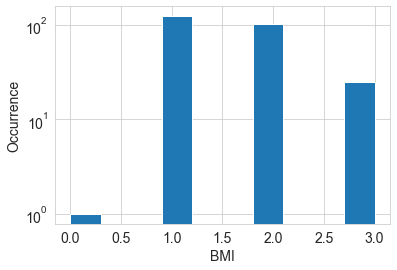

In [20]:
# Plot the histogram of the review counts
sns.set_style("whitegrid")
fig, ax = plt.subplots()
df["BMI_cat_4"].hist(ax=ax) #, bins=50)
ax.set_yscale("log")
ax.tick_params(labelsize=14)
ax.set_xlabel("BMI", fontsize=14)
ax.set_ylabel("Occurrence", fontsize=14)
plt.show()